In [1]:
print("Vaishnavi Shinde")
print("1132200485")

Vaishnavi Shinde
1132200485


In [2]:
#import libraries

#NUmber crunching
import pandas as pd
import numpy as np

#Plots and graphs
import matplotlib.pyplot as plt  
import seaborn as sns

#Model building
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#Plots and graphs
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [3]:
%cd D:\NOTES\SEM 3\Lab On ML 2\Dataset

D:\NOTES\SEM 3\Lab On ML 2\Dataset


### Loading the Dataset

In [4]:
dataset=pd.read_csv('Fish.csv')

In [5]:
dataset.shape

(159, 7)

In [6]:
dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


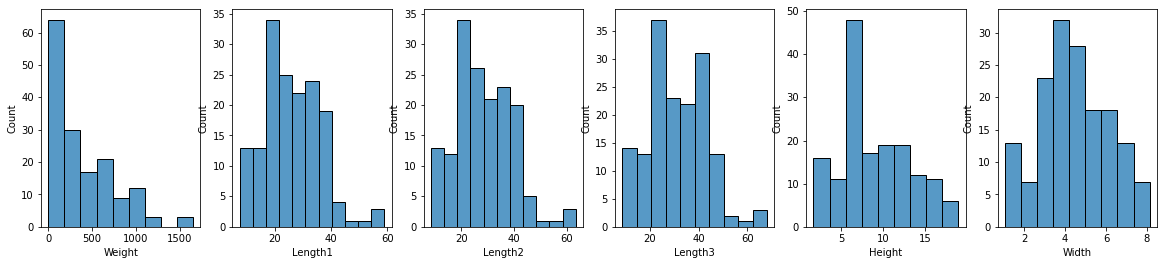

In [8]:
fig, ax = plt.subplots(ncols=6, figsize=(20, 4))
variables = dataset.columns[1:]
for i, var in enumerate(variables):
    sns.histplot(data=dataset, x=var, ax=ax[i])
plt.show()

### ENCODING
#### Here While dealing with categorical values, we have used the get_dummies method. It is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [9]:
Fish = pd.get_dummies(dataset["Species"])

In [10]:
Fish.shape

(159, 7)

In [11]:
dataset = pd.concat([dataset, Fish], axis = 1)

In [12]:
dataset = dataset.drop("Species", axis =1)

In [13]:
dataset.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [14]:
dataset.shape

(159, 13)

In [15]:
X_train=dataset.drop('Weight',axis=1)

In [16]:
y_train= dataset['Weight']


In [17]:
X_train.shape,y_train.shape

((159, 12), (159,))

array([[<AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='Length1', ylabel='Weight'>,
        <AxesSubplot:xlabel='Length2', ylabel='Weight'>,
        <AxesSubplot:xlabel='Length3', ylabel='Weight'>,
        <AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='Width', ylabel='Weight'>,
        <AxesSubplot:xlabel='Bream', ylabel='Weight'>,
        <AxesSubplot:xlabel='Parkki', ylabel='Weight'>,
        <AxesSubplot:xlabel='Perch', ylabel='Weight'>,
        <AxesSubplot:xlabel='Pike', ylabel='Weight'>,
        <AxesSubplot:xlabel='Roach', ylabel='Weight'>,
        <AxesSubplot:xlabel='Smelt', ylabel='Weight'>,
        <AxesSubplot:xlabel='Whitefish', ylabel='Weight'>],
       [<AxesSubplot:xlabel='Weight', ylabel='Length1'>,
        <AxesSubplot:xlabel='Length1', ylabel='Length1'>,
        <AxesSubplot:xlabel='Length2', ylabel='Length1'>,
        <AxesSubplot:xlabel='Length3', ylabel='Length1'>,
        <AxesSubplot:xlabel='Height', yla

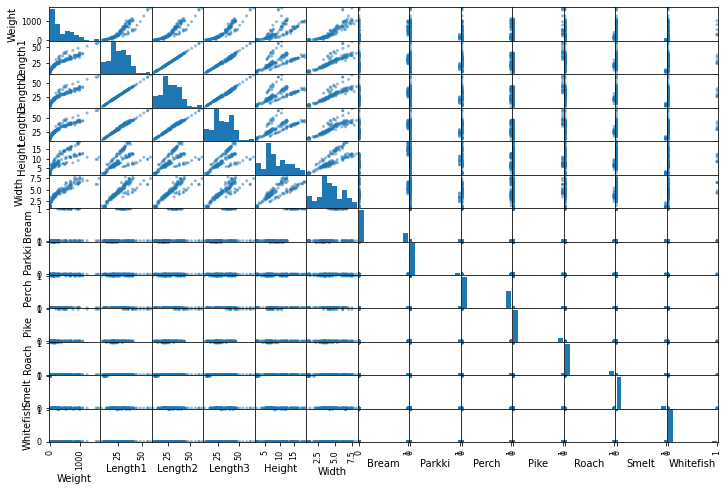

In [18]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset, figsize=(12, 8))

In [19]:
corr_matrix=dataset.corr()
corr_matrix

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,0.326795,-0.186034,-0.033240,0.310641,-0.261784,-0.337109,0.073625
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,0.216380,-0.205732,-0.037845,0.563514,-0.213250,-0.467420,0.050731
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,0.233391,-0.205957,-0.036090,0.552780,-0.218048,-0.479775,0.053777
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,0.327170,-0.198718,-0.105478,0.522894,-0.205072,-0.488397,0.052864
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,0.772443,-0.000547,-0.191405,-0.101810,-0.202076,-0.491731,0.048951
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,0.319347,-0.194147,0.144021,0.137722,-0.171465,-0.569018,0.124388
Bream,0.326795,0.216380,0.233391,0.327170,0.772443,0.319347,1.000000,-0.144840,-0.391741,-0.183825,-0.201526,-0.165083,-0.105209
Parkki,-0.186034,-0.205732,-0.205957,-0.198718,-0.000547,-0.194147,-0.144840,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Perch,-0.033240,-0.037845,-0.036090,-0.105478,-0.191405,0.144021,-0.391741,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Pike,0.310641,0.563514,0.552780,0.522894,-0.101810,0.137722,-0.183825,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519


<AxesSubplot:>

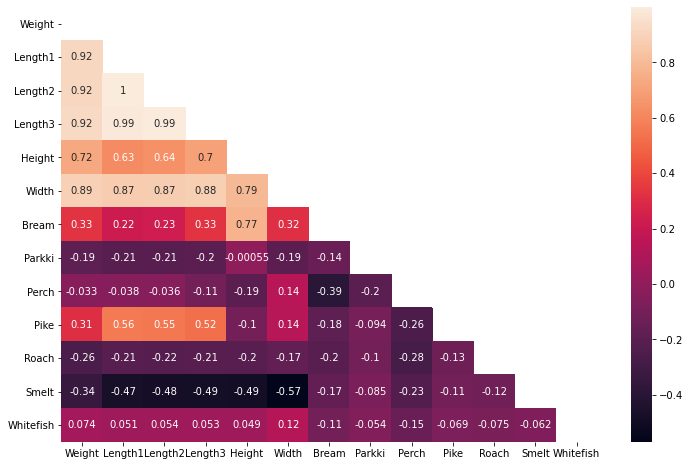

In [20]:
plt.figure(figsize=(12, 8))
corr_matrix=dataset.corr()
matrix=np.triu(corr_matrix)
sns.heatmap(corr_matrix,mask=matrix,annot=True)

In [21]:
corr_matrix["Weight"].sort_values(ascending=False)

Weight       1.000000
Length3      0.923044
Length2      0.918618
Length1      0.915712
Width        0.886507
Height       0.724345
Bream        0.326795
Pike         0.310641
Whitefish    0.073625
Perch       -0.033240
Parkki      -0.186034
Roach       -0.261784
Smelt       -0.337109
Name: Weight, dtype: float64

### Our Target Variable -Weight has lowest correlation with WhiteFish and Perch Fish 
### Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [23]:
print(X_train.shape )

(127, 12)


In [24]:
print(X_test.shape )

(32, 12)


In [25]:
print(y_train.shape )

(127,)


In [26]:
print(y_test.shape )

(32,)


## Applying KNeighborsRegressor
## Using default Euclidean Distance

In [27]:
from sklearn.neighbors import KNeighborsRegressor
knnregressor = KNeighborsRegressor(n_neighbors=5)
knnregressor.fit(X_train, y_train)

KNeighborsRegressor()

In [28]:
print(knnregressor.predict(X_test))

[ 448.6   109.4   165.    149.    685.8   841.    723.    413.    970.
  122.    394.8   623.4   881.    948.     44.28   81.2   144.   1017.4
  124.    717.8    36.68  442.8   133.   1017.4    89.4   485.    684.8
  270.    841.      8.6   654.    132.  ]


In [29]:
knnregressor.score(X_test,y_test)

0.8550832431611242

In [30]:
knnregressor

KNeighborsRegressor()

In [31]:
knnregressor = KNeighborsRegressor(n_neighbors=5,algorithm='ball_tree')
knnregressor.fit(X_train, y_train)
knnregressor.score(X_test,y_test)

0.8550832431611242

In [32]:
k_values = np.arange(1,100,2)
print(k_values)


[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


In [33]:
train_score_arr = []
val_score_arr = []

for k in k_values:
    
    model = KNeighborsRegressor(n_neighbors=k,algorithm='ball_tree')
    model.fit(X_train,y_train)
    
    # We evaluate the performance of model, for each k - value
    train_score = model.score(X_train, y_train) 
    train_score_arr.append(train_score*100)
    
    val_score = model.score(X_test, y_test)
    val_score_arr.append(val_score*100)
    
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

k=1, train_accuracy=100.00%, test_accuracy=96.31%
k=3, train_accuracy=97.82%, test_accuracy=93.54%
k=5, train_accuracy=95.24%, test_accuracy=85.51%
k=7, train_accuracy=92.42%, test_accuracy=81.17%
k=9, train_accuracy=90.12%, test_accuracy=79.21%
k=11, train_accuracy=89.13%, test_accuracy=77.32%
k=13, train_accuracy=89.31%, test_accuracy=77.59%
k=15, train_accuracy=88.93%, test_accuracy=76.74%
k=17, train_accuracy=88.69%, test_accuracy=76.90%
k=19, train_accuracy=87.66%, test_accuracy=76.20%
k=21, train_accuracy=87.17%, test_accuracy=75.72%
k=23, train_accuracy=86.21%, test_accuracy=73.18%
k=25, train_accuracy=86.22%, test_accuracy=72.89%
k=27, train_accuracy=85.71%, test_accuracy=72.35%
k=29, train_accuracy=85.33%, test_accuracy=71.53%
k=31, train_accuracy=85.10%, test_accuracy=70.55%
k=33, train_accuracy=84.14%, test_accuracy=69.42%
k=35, train_accuracy=83.62%, test_accuracy=68.77%
k=37, train_accuracy=83.40%, test_accuracy=68.06%
k=39, train_accuracy=82.38%, test_accuracy=66.71%
k=41

Text(0, 0.5, 'Accuracy')

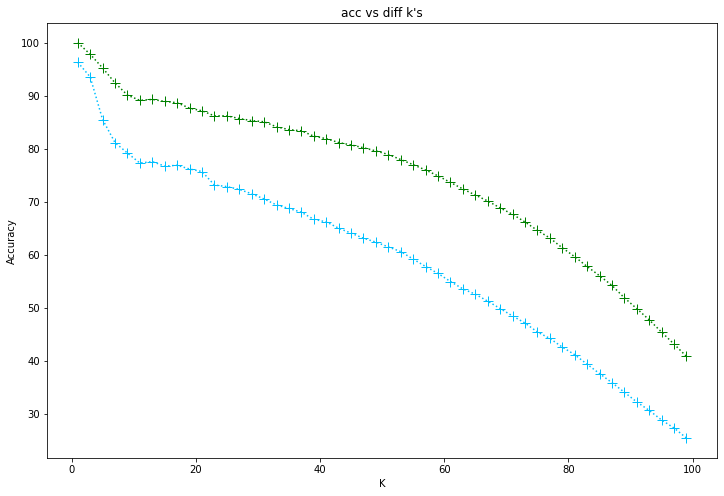

In [34]:
d1=plt.figure(figsize=(12,8))
plt.plot(k_values,train_score_arr,color="green",linestyle="dotted",marker="+",markersize=10)
plt.plot(k_values,val_score_arr,color="deepskyblue",linestyle="dotted",marker="+",markersize=10)
plt.title("acc vs diff k's")
plt.xlabel('K')
plt.ylabel('Accuracy')

### Here for Euclidean distance we get highest accuracy at k=1 and as the K increases the test accuracy decreases

### Applying Manhattan Distance

In [35]:
knnregressor = KNeighborsRegressor(n_neighbors=5,p=1,algorithm='ball_tree')
knnregressor.fit(X_train, y_train)
knnregressor.score(X_test,y_test)

0.8465201146086426

In [36]:
knnregressor

KNeighborsRegressor(algorithm='ball_tree', p=1)

In [37]:
k_values = np.arange(1,100,2)
print(k_values)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


In [38]:
train_score_arr = []
val_score_arr = []

for k in k_values:
    
    model = KNeighborsRegressor(n_neighbors=k,algorithm='ball_tree',weights='distance',p=1)
    model.fit(X_train,y_train)
    
    # We evaluate the performance of model, for each k - value
    train_score = model.score(X_train, y_train) 
    train_score_arr.append(train_score*100)
    
    val_score = model.score(X_test, y_test)
    val_score_arr.append(val_score*100)
    
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

k=1, train_accuracy=100.00%, test_accuracy=96.33%
k=3, train_accuracy=100.00%, test_accuracy=96.48%
k=5, train_accuracy=100.00%, test_accuracy=94.90%
k=7, train_accuracy=100.00%, test_accuracy=93.58%
k=9, train_accuracy=100.00%, test_accuracy=93.19%
k=11, train_accuracy=100.00%, test_accuracy=92.48%
k=13, train_accuracy=100.00%, test_accuracy=91.38%
k=15, train_accuracy=100.00%, test_accuracy=90.86%
k=17, train_accuracy=100.00%, test_accuracy=90.18%
k=19, train_accuracy=100.00%, test_accuracy=89.69%
k=21, train_accuracy=100.00%, test_accuracy=89.02%
k=23, train_accuracy=100.00%, test_accuracy=88.34%
k=25, train_accuracy=100.00%, test_accuracy=88.16%
k=27, train_accuracy=100.00%, test_accuracy=87.49%
k=29, train_accuracy=100.00%, test_accuracy=87.29%
k=31, train_accuracy=100.00%, test_accuracy=86.99%
k=33, train_accuracy=100.00%, test_accuracy=86.69%
k=35, train_accuracy=100.00%, test_accuracy=86.13%
k=37, train_accuracy=100.00%, test_accuracy=85.61%
k=39, train_accuracy=100.00%, test_a

Text(0, 0.5, 'Accuracy')

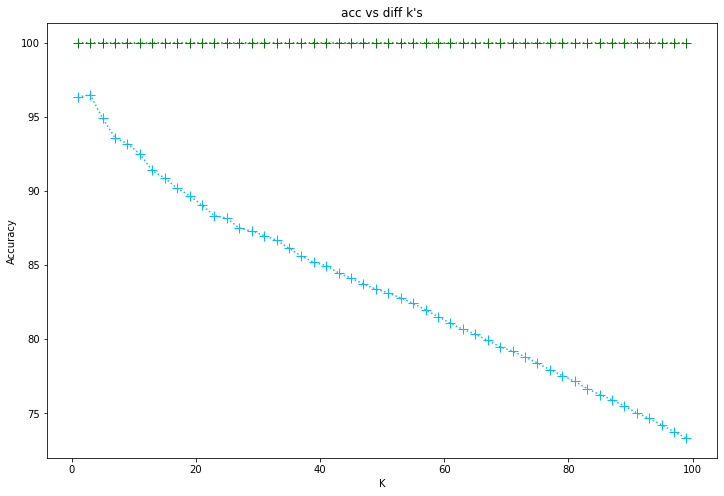

In [39]:
d2=plt.figure(figsize=(12,8))
plt.plot(k_values,train_score_arr,color="green",linestyle="dotted",marker="+",markersize=10)
plt.plot(k_values,val_score_arr,color="deepskyblue",linestyle="dotted",marker="+",markersize=10)
plt.title("acc vs diff k's")
plt.xlabel('K')
plt.ylabel('Accuracy')

#### Here in Manhattan distance also we can see that as the k increases the test accuracy decreases, and also the highest accuracy occured at k=1 and gradually decreases.

# Applying Standardization

In [40]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knnregressor = KNeighborsRegressor(n_neighbors=5,algorithm='ball_tree')
knnregressor.fit(X_train, y_train)
pr=knnregressor.predict(X_test)

In [42]:
knnregressor.score(X_test,y_test)

0.8173449653902884

In [43]:
k_values = np.arange(1,100,2)
print(k_values)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


In [44]:
train_score_arr = []
val_score_arr = []

for k in k_values:
    
    model = KNeighborsRegressor(n_neighbors=k,algorithm='ball_tree',p=1,weights='distance')
    model.fit(X_train,y_train)
    
    # We evaluate the performance of model, for each k - value
    train_score = model.score(X_train, y_train) 
    train_score_arr.append(train_score*100)
    
    val_score = model.score(X_test, y_test)
    val_score_arr.append(val_score*100)
    
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

k=1, train_accuracy=100.00%, test_accuracy=93.17%
k=3, train_accuracy=100.00%, test_accuracy=89.01%
k=5, train_accuracy=100.00%, test_accuracy=89.47%
k=7, train_accuracy=100.00%, test_accuracy=88.74%
k=9, train_accuracy=100.00%, test_accuracy=87.45%
k=11, train_accuracy=100.00%, test_accuracy=86.74%
k=13, train_accuracy=100.00%, test_accuracy=86.24%
k=15, train_accuracy=100.00%, test_accuracy=86.59%
k=17, train_accuracy=100.00%, test_accuracy=86.93%
k=19, train_accuracy=100.00%, test_accuracy=87.10%
k=21, train_accuracy=100.00%, test_accuracy=86.97%
k=23, train_accuracy=100.00%, test_accuracy=86.87%
k=25, train_accuracy=100.00%, test_accuracy=86.68%
k=27, train_accuracy=100.00%, test_accuracy=86.72%
k=29, train_accuracy=100.00%, test_accuracy=86.74%
k=31, train_accuracy=100.00%, test_accuracy=86.66%
k=33, train_accuracy=100.00%, test_accuracy=86.70%
k=35, train_accuracy=100.00%, test_accuracy=86.42%
k=37, train_accuracy=100.00%, test_accuracy=86.08%
k=39, train_accuracy=100.00%, test_a

Text(0, 0.5, 'Accuracy')

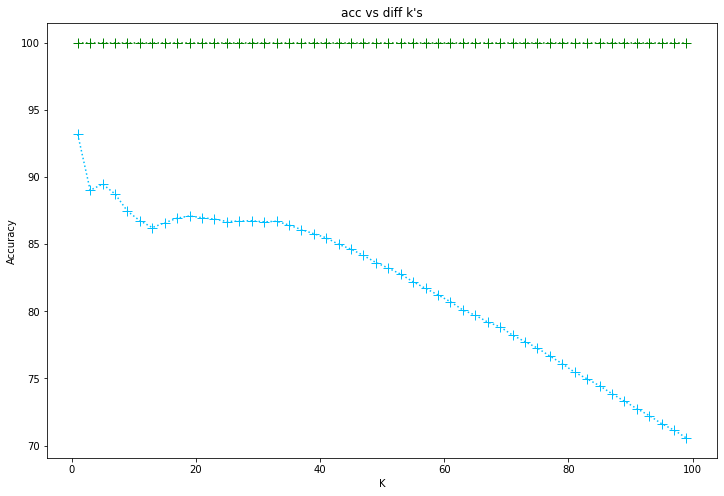

In [45]:
plt.figure(figsize=(12,8))
plt.plot(k_values,train_score_arr,color="green",linestyle="dotted",marker="+",markersize=10)
plt.plot(k_values,val_score_arr,color="deepskyblue",linestyle="dotted",marker="+",markersize=10)
plt.title("acc vs diff k's")
plt.xlabel('K')
plt.ylabel('Accuracy')

#### After applying standardization the test accuracy dropped in minimal amount as compared to the test accuracy before where stanrdization was not applied

# 